In [1]:
# install fredapi, the api for fred where we will be scraping data from
!pip install fredapi

### IMPORT NECESSARY LIBRARIES

In [2]:
# Importing pandas library with alias pd for data manipulation
import pandas as pd

# Importing numpy library with alias np for numerical computing
import numpy as np

# Importing matplotlib.pyplot module with alias plt for plotting
import matplotlib.pyplot as plt

# Importing plotly.express library with alias px for interactive plotting
import plotly.express as px

# Importing fredapi
from fredapi import Fred

In [3]:
plt.style.use('fivethirtyeight') # Emulate popular data-driven website "FiveThirtyEight"

# Configuring pandas to display a maximum of 500 columns
pd.set_option('display.max_columns', 500)


# Accessing matplotlib configuration parameters related to the color cycle used for plotting axes
color_cycle = plt.rcParams['axes.prop_cycle']

# Extracting the color palette as a dictionary-like object
color_palette_dict = color_cycle.by_key()

# Accessing the sequence of colors defined in the color palette
color_pal = color_palette_dict['color']

plt.style.use('fivethirtyeight') is a command that sets the plotting style to emulate the style of the popular data-driven news website FiveThirtyEight. This command is typically used with `matplotlib`to adjust the appearance of plots generated using `matplotlib`.

### CREATING THE FRED OBJECT USING API KEY

In [4]:
# The fred object that would be created here is the object we will be using to search for any data we need from the website
# Fred api key generated for me on their website
fred_api_key = "c1411fa3a75d1a1847248dff76a432ae"

# fred object
fred_object = Fred(api_key = fred_api_key)

### SEARCH FOR ECONOMIC DATA

In [5]:
s_and_p_data = fred_object.search('S&P', order_by='popularity')

In [6]:
# print the first 5 rows
s_and_p_data.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-02-27,2024-02-27,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-02-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-02-27 07:46:03-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-02-27,2024-02-27,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-02-27 08:14:02-06:00,87,"For more information regarding the index, plea..."
SP500,SP500,2024-02-27,2024-02-27,S&P 500,2014-02-27,2024-02-26,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-02-26 19:10:59-06:00,84,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-02-27,2024-02-27,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-02-27,2024-02-27,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-02-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-02-27 07:46:07-06:00,82,This data represents the effective yield of th...


### PULL RAW DATA

<Axes: title={'center': 'SP500'}>

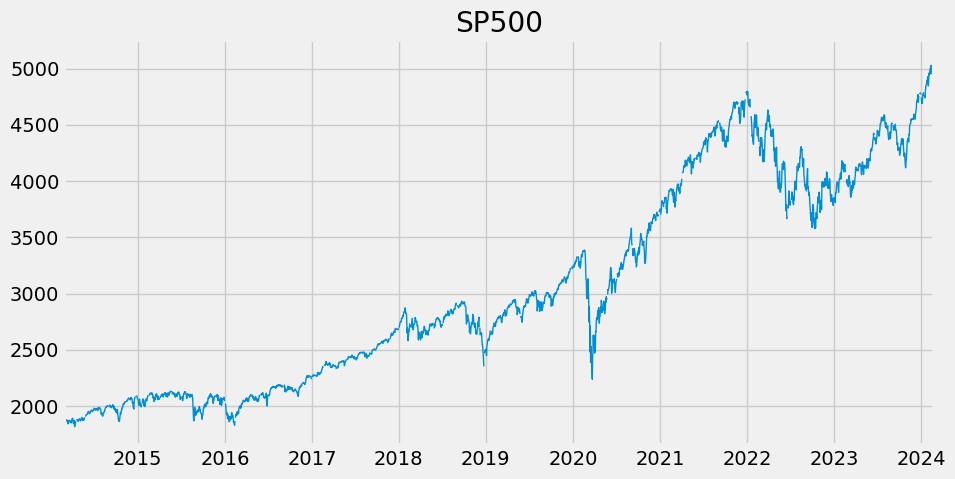

In [9]:
sp500 = fred_object.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title='SP500', lw=1)

<Axes: title={'center': 'Unemployment Through The Years'}>

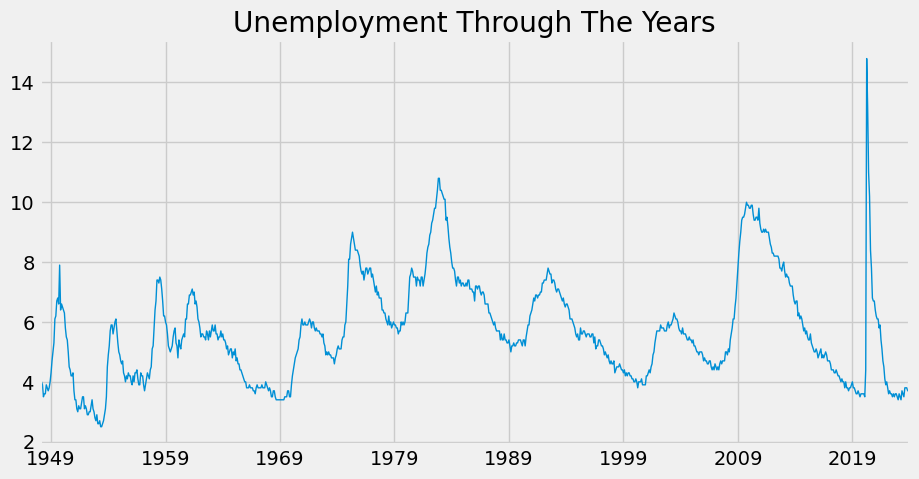

In [30]:
# General unemployment data
unrate = fred_object.get_series('UNRATE')
unrate.head()
unrate.plot(figsize=(10,5), title='Unemployment Through The Years', lw=1)

In [26]:
# Filtered unemployment data
unemployment_df = fred_object.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemployment_df2 = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemployment_df3 = unemployment_df2[unemployment_df2['title'].str.contains('Unemployment Rate')]

In [27]:
unemployment_df3.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR',
       'LNS14027660', 'OHUR', 'LNS14027662', 'ALUR', 'MIUR', 'LNS14000001',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'AZUR', 'COUR',
       'LRUN64TTUSM156S', 'MNUR', 'WIUR', 'LNS14027659', 'SCUR', 'LNS14032183',
       'VAUR', 'TNUR', 'NMUR', 'KYUR', 'WAUR', 'MDUR', 'NVUR', 'WVUR', 'ORUR',
       'INUR', 'LAUR', 'ARUR', 'AKUR', 'PRUR', 'LNS14000012', 'OKUR', 'MOUR',
       'IAUR', 'MTUR', 'NDUR', 'HIUR', 'UTUR', 'LNS14000060',
       'LASMT261982000000003', 'MSUR', 'MEUR', 'NEUR', 'LNS14000018', 'WYUR',
       'LNS14000028', 'IDUR', 'NHUR', 'KSUR', 'LASMT391746000000003', 'DCUR',
       'CTUR', 'SDUR', 'RIUR', 'DEUR', 'VTUR', 'LNS14000036', 'LNS14000032',
       'LNS14100000', 'LNS14000061', 'CMWRUR', 'LNS14200000',
       'LRUN24TTUSM156S', 'LNS14000315', 

In [28]:
all_data_results = []
for id in unemployment_df3.index:
    results = fred_object.get_series(id)
    results = results.to_frame(name=id)
    all_data_results.append(results)

In [29]:
all_data_results = []
for id in unemployment_df3.index:
    results = fred_object.get_series(id)
    # results = results.to_frame(name=id)
    all_data_results.append(results)
    pd.concat(all_data_results, axis=1)